# Fully Connected vs. Convolutional Neural Networks

## Refs 

https://www.tensorflow.org/install

https://www.tensorflow.org/tutorials/keras/classification
    

In [72]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def show_images(rows, cols, data, labels):

    width= 3 * rows
    height= 3 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = data[a]
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :, 0], cmap='gray')
    fig.tight_layout()    
    plt.show()


## Load and reshape dataset

In [74]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)



(60000, 28, 28) (60000,)


In [75]:
# reshape to get shape as (total images, width, height, channels)
x_train = x_train.reshape(
    (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape(
    (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Display some images from dataset

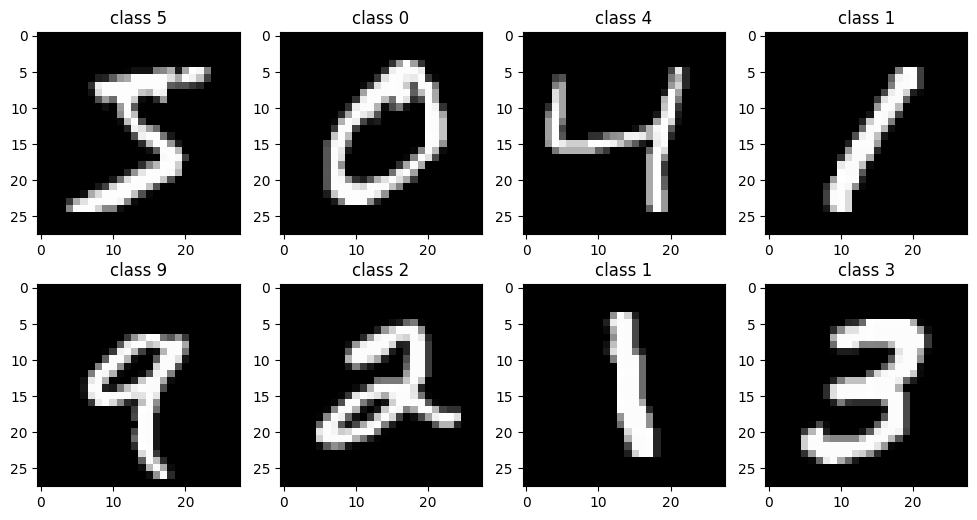

<Figure size 640x480 with 0 Axes>

In [76]:
show_images(2,4,x_train, y_train)    

# Build fully connected model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


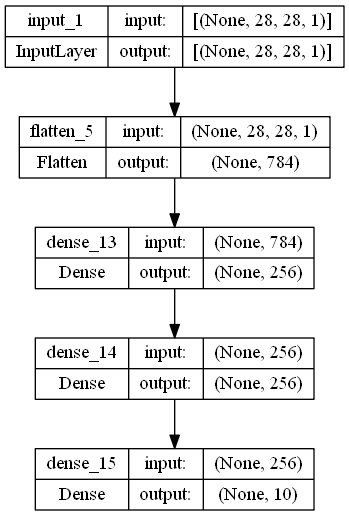

In [77]:
def createSeqModel():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model                  


model = createSeqModel()
print(model.summary())
tf.keras.utils.plot_model(model,show_shapes=True)

### Evaluation before training should provide close to random value

In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - loss: 2.3536 - accuracy: 0.0843 - 3s/epoch - 8ms/step


[2.3535735607147217, 0.08429999649524689]

## Train model

In [8]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, 
                    validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2201 - accuracy: 0.9347 - val_loss: 0.1134 - val_accuracy: 0.9653
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0914 - accuracy: 0.9719 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.1146 - val_accuracy: 0.9658
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0947 - val_accuracy: 0.9744
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0971 - val_accuracy: 0.9743
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0996 - val_accuracy: 0.9772
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.1080 - val_accuracy:

## Evaluate Model

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2222 - accuracy: 0.9816 - 727ms/epoch - 2ms/step


[0.22217309474945068, 0.9815999865531921]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


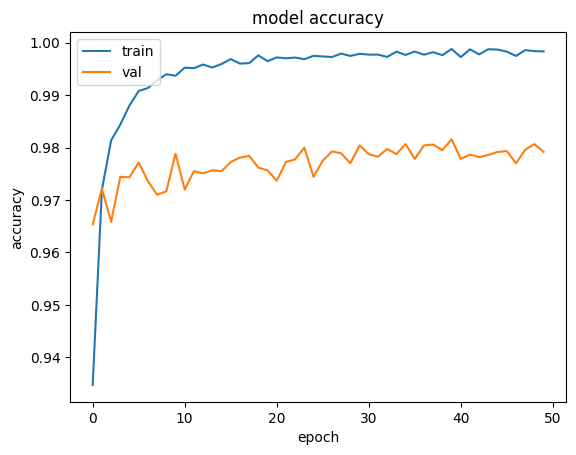

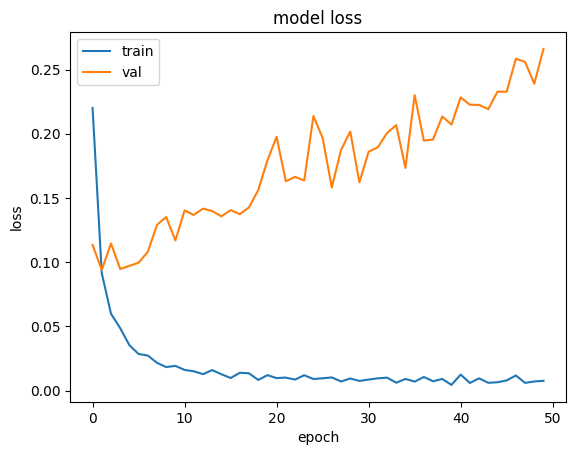

In [10]:
show_history(history)

In [11]:
best_epoch = np.argmax(history.history['val_accuracy'])  

# epoch numbering starts at 1
print(best_epoch + 1, history.history['val_accuracy'][best_epoch])

40 0.9815833568572998


## Defining Callbacks

Save model on best epoch, early stopping, and tensorboard

Go to folder where the log folder is locatted and call >tensorboard --logdir "log folder"

then open a browser and go to:

    http://localhost:6006/

In [81]:
from tensorflow.keras.callbacks import ModelCheckpoint, \
    EarlyStopping, TensorBoard

file_path = 'best_modelS/cp.ckpt'
checkpointerS = ModelCheckpoint(filepath= file_path, 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_weights_only=True,
                               save_best_only=True)


earlyStopperS = EarlyStopping(monitor='val_accuracy', min_delta = 0.0001, 
                                patience = 8, verbose = 1)

tbCallBackS = TensorBoard(log_dir='logS', histogram_freq=0, 
                                write_graph=True, write_images=True)

## Train

In [13]:
model2 = createSeqModel()

history = model2.fit(x_train, y_train, batch_size=32, epochs=50, 
                     validation_split=0.2,
                    callbacks=[checkpointerS, earlyStopperS, tbCallBackS ])

Epoch 1/50
1484/1500 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9323
Epoch 1: val_accuracy improved from -inf to 0.96417, saving model to best_modelS\cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2197 - accuracy: 0.9325 - val_loss: 0.1271 - val_accuracy: 0.9642
Epoch 2/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.0910 - accuracy: 0.9719
Epoch 2: val_accuracy improved from 0.96417 to 0.97083, saving model to best_modelS\cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9719 - val_loss: 0.1001 - val_accuracy: 0.9708
Epoch 3/50
1489/1500 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9810
Epoch 3: val_accuracy improved from 0.97083 to 0.97258, saving model to best_modelS\cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0928 - val_accuracy: 0.9726
Epoch 4/50
1489/1500 [============

## Show history and evaluate

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


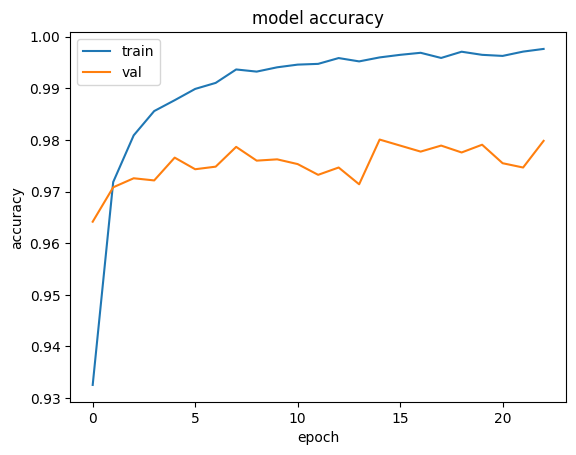

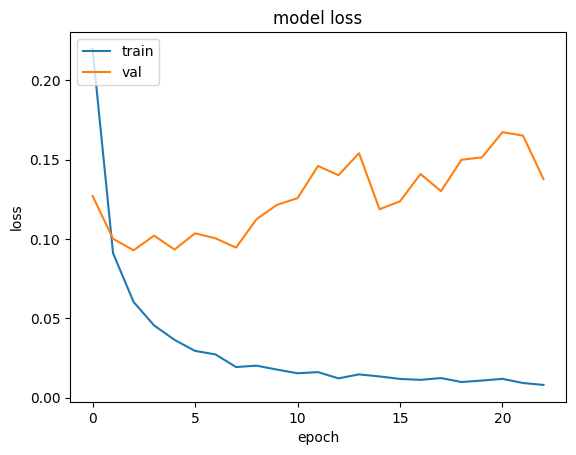

In [14]:
show_history(history)


In [15]:
model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1176 - accuracy: 0.9817 - 762ms/epoch - 2ms/step


[0.11757344752550125, 0.9817000031471252]

## Create new model, load weights and evaluate

Note: the weights are from the best epoch

In [16]:
newSeqModel = createSeqModel()
newSeqModel.load_weights(file_path)
newSeqModel.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1041 - accuracy: 0.9805 - 785ms/epoch - 3ms/step


[0.10414247959852219, 0.9804999828338623]

# Convolutional Model

In [82]:
def createConvModel():

    modelConv = tf.keras.models.Sequential()
    modelConv.add(tf.keras.layers.Input(shape=(28,28,1)))
    modelConv.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
    modelConv.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
    modelConv.add(tf.keras.layers.Flatten())
    modelConv.add(tf.keras.layers.Dense(32, activation='relu'))
    modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))


    modelConv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return modelConv

modelConv = createConvModel()

print(modelConv.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                294944    
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 297,754
Trainable params: 297,754
Non-trainable params: 0
_________________________________________________________________
None


### Understanding the output shape of the convolutional layers

The input of the first convolutional layer is a single channel image with dimension 28 x 28. Since no padding was specified, the default value 'valid' is used. This implies that the kernel is not applied at the borders of the image. Using a 3 x 3 filter means that the filter is not applied to the top and bottom rows, as well as left and right columns, resulting in an image with less 2 columns and less two rows, i.e. 26 x 26.

If a 5 x 5 filter was used then the output would be 24 x 24.

On the other hand, setting padding = 'same' would keep the original dimensions


### Counting the number of weights

The first convolutional layer has 16 filters, with 3x3 kernels. The input is a single channel image.

- number of parameters = number of weights + number of biases

- number of weights = number of input channels x number of filters x filter width x filter height = 1 x 16 x 3 x 3 = 144

- number of biases = number of filters (one bias per filter) = 16

- number of parameters = 144 + 16 = 160

The second convolutional layer has an input with 16 channels (the output from each of the filters from the previous convolutional layer)

- number of weights = number of input channels x number of filters x filter width x filter height = 16 * 16 * 3 * 3 = 2304

- number of biases = number of filters = 16

- number of parameters = 2304 + 16 = 2302

The first dense layer receives a flattened input from the last convolution layer with dimension = 24 x 24 x 16 = 9216 parameters.

This layer has 32 units, so the total number of parameters = 9216 x 32 + 32 = 294944

Considering the second dense layer, it has an input of 32 values and contains 10 units, hence, the number of parameters is = 32 x 10 + 10 = 330

#### Two notes:

- the bulk of the training parameters comes from the dense layers

- the number of parameters of a convolutional layer does not depend on the input image width or height. It only depends on the number of channels.



### Counting the number of multiplications and Additions

In a dense layer with $n$ input units and $m$ output units, the number of operations is:

- multiplications: $n \times m$
- additions: $(n-1) \times m$ 

Note that the number od multiplications matches the number of weights connecting the layer to its input, as there is a multiplication per weight.

In a convolutional layer the number of operations is dependent on the dimension of the output, which determines the number of convolutions applied per input channel, and the number of filters. Hence,

- total number of convolutions is $h \times w \times channels \times filters$

where $h$ and $w$ are the hight and width of the input.

Per convolution the number of operations is dependent on the dimension of the kernel. For a kernel $kw \times kh$, the number of operations is:

- multiplications: $kw \times kh$
- additions: $kw \times kh - 1$ 

Considering the first convolution layer, the number of input channels is $1$, the output's dimensions is $26 \times 26$, the number of filters is $16$, hence, the number of convolutions is:

- convs = $26 \times 26 \times\ 1 \times 16 = 10816$

The kernel is $3 \times 3$, therefore, there are $9 multiplications and 8 additions per convolution. 

The total number of operations is:

- multiplications: $10816 \times 9 = 97377 $
- additions: $10816 \times 8 = 86528$

Notes:

- The number of operations in a convolutional layer can be quite large, even when the number of weights is rather small. In the first hidden layer we had only 160 weights, but almost 100.000 multiplications.

## Define callbacks and train

In [18]:
checkpoint_path = "best_modelC/cp.ckpt"
checkpointerC = ModelCheckpoint(filepath= checkpoint_path, 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_weights_only=True,
                               save_best_only=True)


earlyStopperC = EarlyStopping(monitor="val_accuracy", min_delta = 0.0005, 
                                patience = 5, verbose = 1)

tbCallBackC = TensorBoard(log_dir='logC', histogram_freq=0,
                                write_graph=True, write_images=True)


In [19]:
history = modelConv.fit(x_train, y_train, 
                        batch_size=32, 
                        epochs=50, 
                        callbacks=[checkpointerC, earlyStopperC, tbCallBackC],
                        validation_split=0.2)

Epoch 1/50
1486/1500 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9508
Epoch 1: val_accuracy improved from -inf to 0.97767, saving model to best_modelC\cp.ckpt
1500/1500 [==============================] - 10s 4ms/step - loss: 0.1627 - accuracy: 0.9510 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 2/50
1491/1500 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9808
Epoch 2: val_accuracy improved from 0.97767 to 0.98267, saving model to best_modelC\cp.ckpt
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0588 - val_accuracy: 0.9827
Epoch 3/50
1489/1500 [============================>.] - ETA: 0s - loss: 0.0391 - accuracy: 0.9871
Epoch 3: val_accuracy improved from 0.98267 to 0.98325, saving model to best_modelC\cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9872 - val_loss: 0.0587 - val_accuracy: 0.9833
Epoch 4/50
1491/1500 [===========

## Show history and evaluate

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


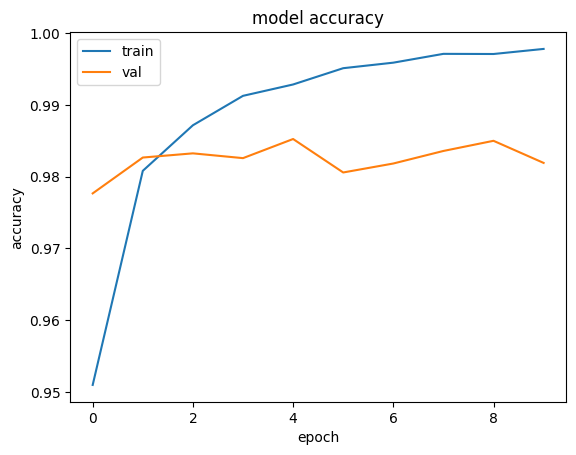

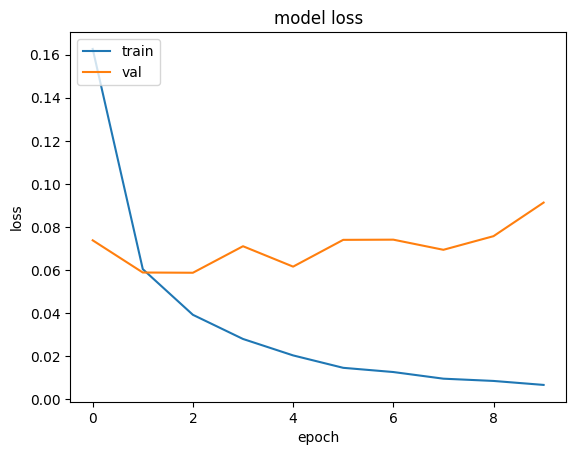

In [20]:
show_history(history)

In [21]:
modelConv.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0788 - accuracy: 0.9823 - 808ms/epoch - 3ms/step


[0.07879869639873505, 0.9822999835014343]

## Create a new model, load the weights and evaluate

In [22]:
m =  createConvModel()


m.load_weights(checkpoint_path)
m.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0521 - accuracy: 0.9847 - 808ms/epoch - 3ms/step


[0.05209677293896675, 0.9847000241279602]

## Visualizing the convolution layers

First we check the layers in the model

In [30]:
for layer in modelConv.layers:
    print (layer.name)

conv2d
conv2d_1
flatten_3
dense_9
dense_10


Build a model with all the conv layers as outputs

In [83]:
# Extract the outputs of the top 2 layers
layer_outputs = [layer.output for layer in modelConv.layers[:2]] 
# Build new model
activation_model = \
    tf.keras.models.Model(inputs=modelConv.input, outputs=layer_outputs) 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
Total params: 2,480
Trainable params: 2,480
Non-trainable params: 0
_________________________________________________________________


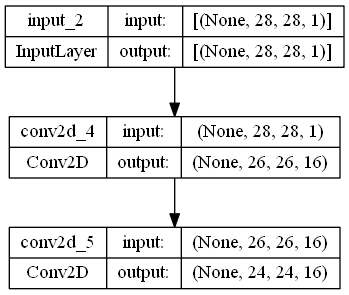

In [84]:
activation_model.summary()
tf.keras.utils.plot_model(activation_model,show_shapes=True)

Feed an image on the new model and get the activations on each output

In [43]:
activations = activation_model.predict(np.asarray([x_test[0]]))
first_layer_activation = activations[0]
print(first_layer_activation.shape)
second_layer_activation = activations[1]
print(second_layer_activation.shape)

1/1 [==============================] - 0s 18ms/step
(1, 26, 26, 16)
(1, 24, 24, 16)


Show the activation of the 3rd filter on the second convolutional layer

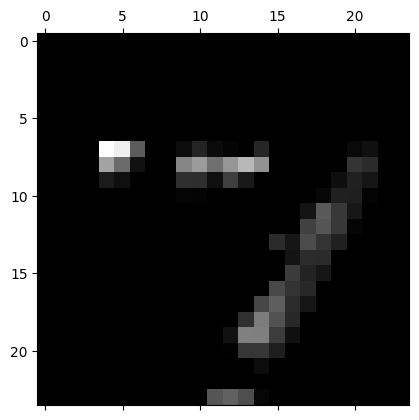

In [26]:
plt.matshow(second_layer_activation[0, :, :, 2], cmap='gray')

Show all activations

['input_2', 'conv2d_4', 'conv2d_5']
(16, 26, 26, 1)


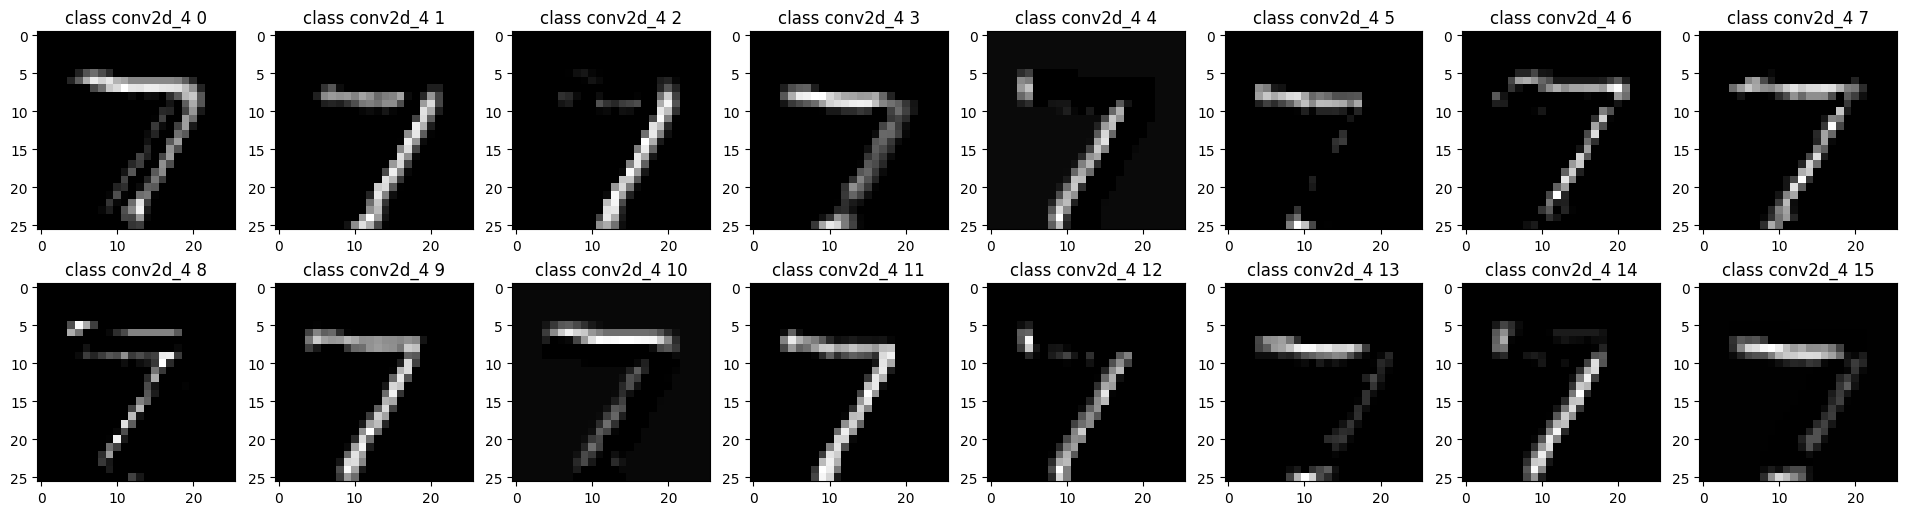

<Figure size 640x480 with 0 Axes>

(16, 24, 24, 1)


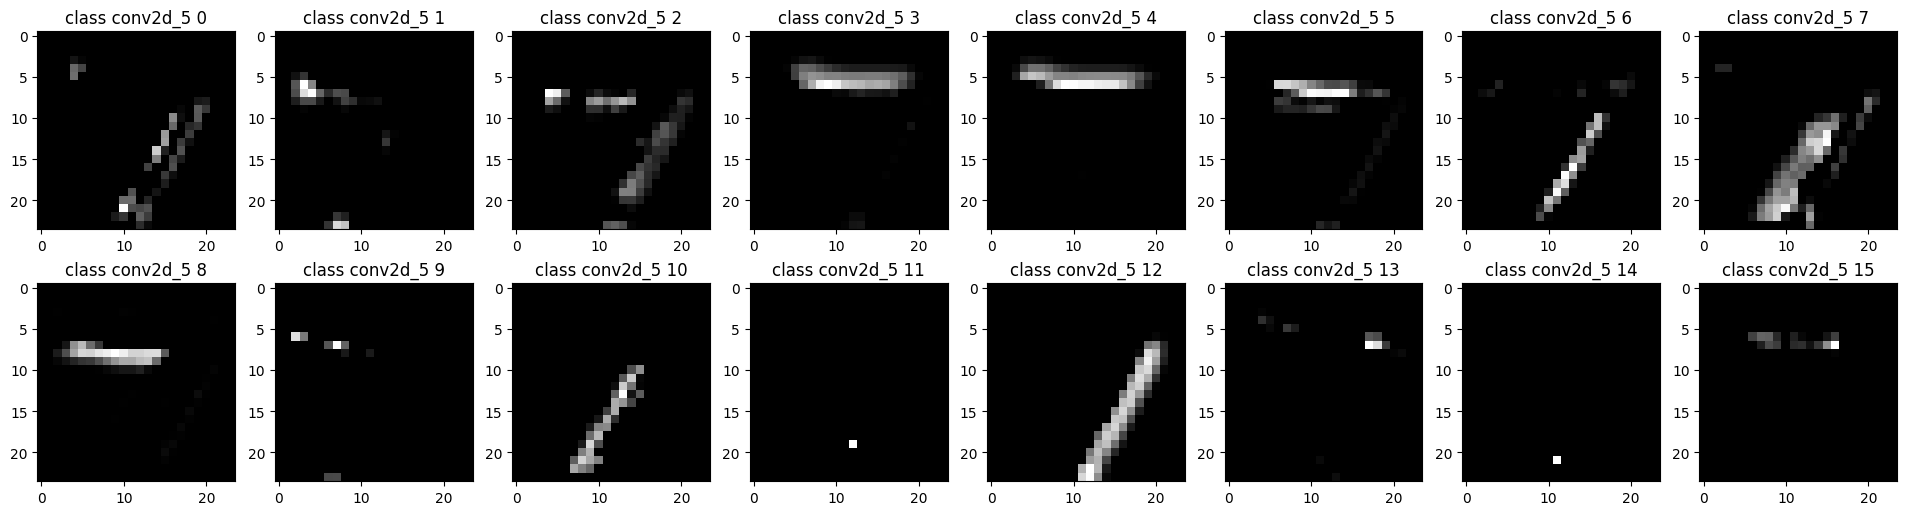

<Figure size 640x480 with 0 Axes>

In [86]:
layer_names = [layer.name for layer in activation_model.layers]
print(layer_names)

for layer_name, layer_activation in zip(layer_names[1:], activations):
    filters = layer_activation.shape[-1]

    labels = [layer_name + ' ' + str(i) for i in range(filters)]

    images = np.swapaxes(layer_activation[0],2,0) # setting filters as the first dimension
    images = np.swapaxes(images, 1,2) # swap x and y
    images = images[..., None] # add an extra dimension at the end
    print(images.shape)
    show_images(2,8, images, labels)

        